# Elastic Distortion

#### Elastic Distortion Function

credit:
- https://gist.github.com/fmder/e28813c1e8721830ff9c
- https://gist.github.com/chsasank/4d8f68caf01f041a6453e67fb30f8f5a
- https://gist.github.com/erniejunior/601cdf56d2b424757de5

In [1]:
import numpy as np

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

## Visualize

In [2]:
%matplotlib inline

import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load MNIST Data Set

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#### Digit Plotting Function

In [4]:
def plot_output(examples, title=None):
    """Visualize each channel in an image or output from 
    a Keras `Conv2D` layer. Intended for graphing mnist digits and 
    their resulting outputs from Keras layers, but probably will 
    work for other examples. 
    
    # Arguments
        examples: numpy array with shape (batch, height, width, channels) 
        title: optional plot title string
    """
   
    num_channels = examples.shape[-1]
    num_examples = examples.shape[0]    
    
    plt.rcParams['figure.figsize'] = (num_examples, num_channels)
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    
    for c in range(num_channels):
        for i, ex in enumerate(examples):
            plt.subplot(num_channels, num_examples, num_examples * c + i + 1)            
            plt.imshow(ex[:,:,c])  
            plt.axis('off')
            if c == 0 and i == 0 and title is not None:
                # only way I found to keep title placement 
                # semi-consistent for different channel counts
                plt.text(
                    x=0,
                    y=-ex.shape[1] // 4,
                    s=title,
                    fontsize=13,
                    horizontalalignment='left', 
                    verticalalignment='bottom')

    plt.show()

In [5]:
num_examples = 10
examples = np.expand_dims(x_train[np.random.choice(x_train.shape[0], num_examples)], -1)
examples = examples / 127.5 * 2 - 1

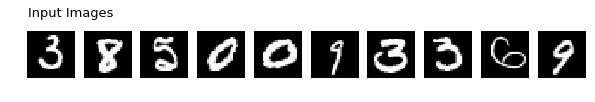

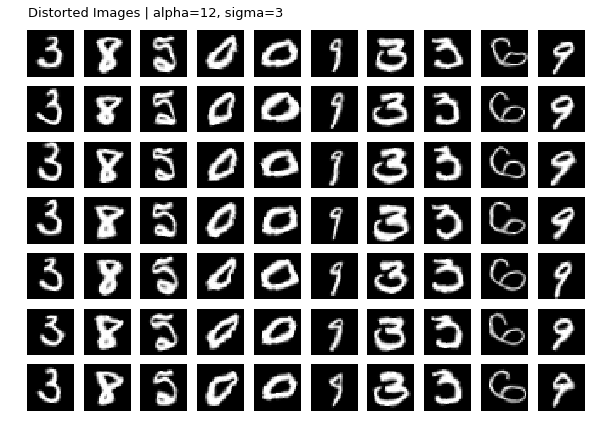

In [6]:
sigma = 3 # elasticity coefficient
alpha = 12 # intensity of deformation

x = [np.array([elastic_transform(image, alpha, sigma) for image in examples]) for i in range(7)]
x = np.concatenate(x, axis=-1)

plot_output(examples, title='Input Images')
plot_output(x, title='Distorted Images | alpha=' + str(alpha) + ', sigma=' + str(sigma))